In [14]:

# libraries for data
import numpy as np
import pandas as pd

# charts
import matplotlib.pyplot as plt

# for splitting data and models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# using Pima Indian Diabetes dataset from Kaggle
data = pd.read_csv('data/diabetes.csv')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

Pregnancies     Glucose  ...         Age     Outcome
count   768.000000  768.000000  ...  768.000000  768.000000
mean      3.845052  120.894531  ...   33.240885    0.348958
std       3.369578   31.972618  ...   11.760232    0.476951
min       0.000000    0.000000  ...   21.000000    0.000000
25%       1.000000   99.000000  ...   24.000000    0.000000
50%       3.000000  117.000000  ...   29.000000    0.000000
75%       6.000000  140.250000  ...   41.000000    1.000000
max      17.000000  199.000000  ...   81.000000    1.000000

[8 rows x 9 columns]

In [6]:
data.head()

Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]

Outcome
0    500
1    268
Name: count, dtype: int64


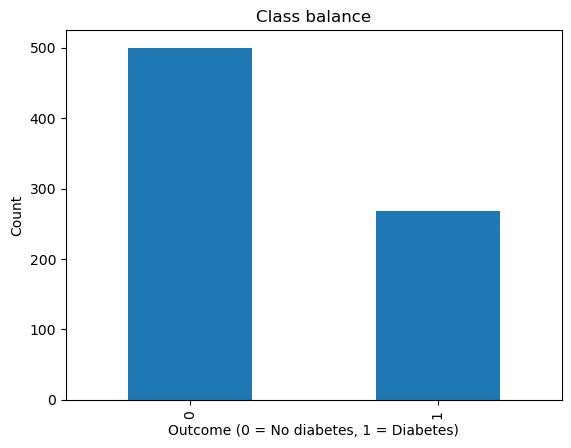

In [8]:

# Bar chart for people who have diabetes vs those who don't
print(data['Outcome'].value_counts())
data['Outcome'].value_counts().plot(kind='bar')
plt.xlabel('Outcome (0 = No diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.title('Class balance')
plt.show()

In [17]:


# feature
X= data.drop('Outcome', axis=1)

# target
y= data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# data preprocessing 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 0 means missing
zero_as_na = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin']

# copies of test/train set to not edit in place
Xtre = X_train.copy()
Xte = X_test.copy()

for c in zero_as_na:
    Xtre.loc[Xtre[c] == 0, c] = np.nan
    Xte.loc[Xte[c] == 0, c] = np.nan

num_features = Xtre.columns.tolist()

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median")),
            ("scaler", StandardScaler())
        ]), num_features)
    ],
    remainder="drop"
)

print("preprocessing ready")
    


preprocessing ready


In [20]:
# training a basic LR model

model = LogisticRegression(max_iter=1000)

model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 71% accuracy via LR model

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154

[[82 18]
 [26 28]]
